# Example 2: Analytical reservoir component.

This example illustrates forward simulation of a system model containing only analytical reservoir component. Simulation time is 200 days with time step of 1 day. There are two types of parameters defined for the reservoir component: deterministic and stochastic. Plots of pressure and CO$_2$ saturation are returned as output. Effect of change of injection rate on the component model output can be investigated.

First, we set the backend of matplotlib to the 'inline' backend (specific for Jupyter notebooks) so that result of all plotting commands is displayed inline directly below the code cell that produces it.

In [1]:
%matplotlib inline

#### 1) Import the standard and third party needed libraries.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

#### 2) Import classes of NRAP-Open-IAM utilized in the example.

In [3]:
from openiam.components.iam_base_classes import SystemModel
from openiam.components.analytical_reservoir_component import AnalyticalReservoir

#### 3) Define parameters of the system model and create it.

In [4]:
# Define keyword arguments of the system model
time_array = np.arange(0, 201)   # in days
sm_model_kwargs = {'time_array': time_array}  # time is given in days
print('System model time points (in days):\n', time_array)

System model time points (in days):
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200]


In [5]:
# Create system model
sm = SystemModel(model_kwargs=sm_model_kwargs)

In the following steps we add an analytical reservoir component of the system model and define its input and output. 

#### 4) Add reservoir component.
The addition of a reservoir component requires:
 - creation of the model object;
 - addition of necessary model parameters;
 - addition of observations that will be used by analysis or plotting.

In [6]:
# Add reservoir component
ares = sm.add_component_model_object(AnalyticalReservoir(name='ares', parent=sm))

In [7]:
# Add parameters of reservoir component model
# numberOfShaleLayers is a deterministic parameter; note vary=False
ares.add_par('numberOfShaleLayers', value=3, vary=False)
# injRate, shale1Thickness and shale2Thickness are stochastic parameters
# For LHS analysis or parameter studies these parameters will have varying values
ares.add_par('injRate', min=0.1, max=0.4, value=0.2)
ares.add_par('shale1Thickness', min=25.0, max=80., value=50.0)
ares.add_par('shale2Thickness', min=35.0, max=90., value=45.0)
# reservoirRadius is a deterministic parameter
ares.add_par('reservoirRadius', value=2500, vary=False)

Additional parameters of the analytical reservoir component will take on the default values specified in the user manual for the parameters of the component.

In [8]:
# Add observations of reservoir component model
ares.add_obs('pressure')
ares.add_obs('CO2saturation')

#### 5) Run simulation.

In [9]:
# Run system model using current values of its parameters
forward_simulation_results = sm.forward()  # system model is run deterministically

#### 6) Collect observations.

In [10]:
# Collect observations from the system model
pressure = sm.collect_observations_as_time_series(ares, 'pressure')
CO2saturation = sm.collect_observations_as_time_series(ares, 'CO2saturation')

#### 7) Create and show figure with outputs.

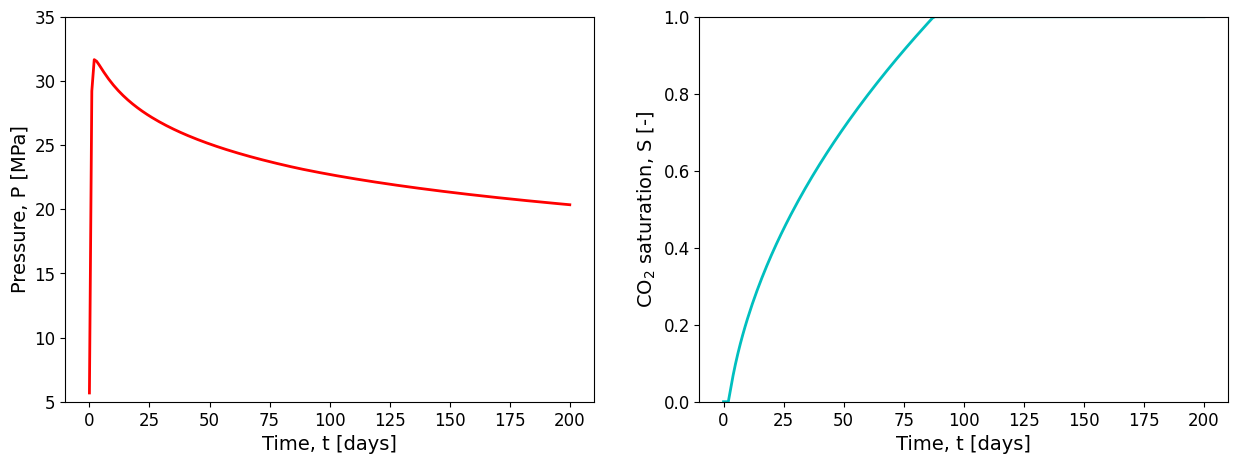

In [11]:
# Define figure parameters
line_width = 2
label_font_size = 14
tick_font_size = 12
    
# Plot pressure and saturation
f, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(time_array, pressure/1.0e+6, 'r-', linewidth=line_width)
ax[0].set_ylim(5., 35)
ax[0].set_xlabel('Time, t [days]', fontsize=label_font_size)
ax[0].set_ylabel('Pressure, P [MPa]', fontsize=label_font_size)
ax[0].tick_params(labelsize=tick_font_size)

ax[1].plot(time_array, CO2saturation, 'c-', linewidth=line_width)
ax[1].set_ylim(0., 1.)
ax[1].set_xlabel('Time, t [days]', fontsize=label_font_size)
ax[1].set_ylabel(r'CO$_2$ saturation, S [-]', fontsize=label_font_size)
ax[1].tick_params(labelsize=tick_font_size)

The following part of the example allows looking at the system model output for varying input. The interact function (ipywidgets.interact) creates user interface controls for exploring code and data interactively. In order to use the interactive feature make sure to rerun all the cells of the notebook.

In [12]:
@widgets.interact(injRate=(0.1, 0.4, 0.01))

# Define method generating plots for the outputs of the system model
def plot(injRate=0.2):    
    # Run system model using defined values of its parameters
    out = sm.forward(pardict={'ares.injRate': injRate, 
                              'ares.shale1Thickness': 50.,
                              'ares.shale2Thickness': 45.})
    
    # Collect observations from the system model
    pressure = sm.collect_observations_as_time_series(ares, 'pressure')
    CO2saturation = sm.collect_observations_as_time_series(ares, 'CO2saturation')
    
    # Plot pressure and saturation
    f, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    ax[0].plot(time_array, pressure/1.0e+6, 'r-', linewidth=line_width)
    ax[0].set_ylim(5., 50.)
    ax[0].set_xlabel('Time, t [days]', fontsize=label_font_size)
    ax[0].set_ylabel('Pressure, P [MPa]', fontsize=label_font_size)
    ax[0].tick_params(labelsize=tick_font_size)
    
    ax[1].plot(time_array, CO2saturation, 'c-', linewidth=line_width)
    ax[1].set_ylim(0., 1.0)
    ax[1].set_xlabel('Time, t [days]', fontsize=label_font_size)
    ax[1].set_ylabel(r'CO$_2$ saturation, S [-]', fontsize=label_font_size)
    ax[1].tick_params(labelsize=tick_font_size)

interactive(children=(FloatSlider(value=0.2, description='injRate', max=0.4, min=0.1, step=0.01), Output()), _…